# GROUP 25

#### Manoj Sanjay Londhe - ml01586 - 6672282

# Consumer Complaints Classification

#### The dataset is Consumer Complaints on Financial products , and we'll look at how to group customer complaints text into these categories: Consumer loans, mortgages, credit cards, credit reporting, student loans, bank accounts or services, payday loans, money transfers, other banking services, prepaid cards and debt collection.

#### We have performed initial analysis using text data performed text pre-processing steps such as Text Standardization,Removing Stopwords,Lemmatization.
#### Utilized SVM ,Logistic Regression, and CNN models to classify text data into 11 categories.

In [42]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=816e1d1c1f9b96e7f28bb0c0cec4b4b2de1d9d10ccd6e1253cbe0a1b40c7bc54
  Stored in directory: c:\users\hitesh\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
import numpy as np
import pandas as pd

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
#path_file = "consumer_complaints.csv"
df = pd.read_csv("consumer_complaints.csv", engine='python')

In [4]:
#printing first 5 rows in the dataset
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [5]:
#checking the types of labels
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [6]:
#generating descriptive statistics of the data set

df.describe(include='all')

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
count,555957,555957,397635,555957,212622,66806,85124,555957,551070,551452,77959,123458,555957,555957,555957,555957,555957,5.559570e+05
unique,1608,11,46,95,68,65646,10,3605,62,27052,3,4,6,1557,8,2,2,NaN
top,08/27/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,This company continues to report on my credit ...,Company chooses not to provide a public response,Bank of America,CA,300XX,Older American,Consent provided,Web,11/13/2015,Closed with explanation,Yes,No,NaN
freq,963,186475,74319,97191,26798,37,52478,55998,81700,1205,45257,66807,361338,1108,404293,541909,443823,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600510e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.504296e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.863230e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.737830e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441702e+06


### Percentage of missing values in each column in the dataset


In [7]:
df.isnull().sum()/df.shape[0]*100

date_received                    0.000000
product                          0.000000
sub_product                     28.477382
issue                            0.000000
sub_issue                       61.755675
consumer_complaint_narrative    87.983603
company_public_response         84.688744
company                          0.000000
state                            0.879025
zipcode                          0.810314
tags                            85.977513
consumer_consent_provided       77.793606
submitted_via                    0.000000
date_sent_to_company             0.000000
company_response_to_consumer     0.000000
timely_response                  0.000000
consumer_disputed?               0.000000
complaint_id                     0.000000
dtype: float64

In [8]:
#created new variable df1 for col with least null values

df1 = df[['complaint_id','date_received','product','issue','company','state','submitted_via','company_response_to_consumer','timely_response','consumer_disputed?','consumer_complaint_narrative']]

In [9]:
df1 = df1[pd.notnull(df1['consumer_complaint_narrative'])]

## Exploratory Data Analysis (EDA)

#### We'll check the disribution of complaints by product category to understand which product received maximum complaints and other products which rarely receive complaints.

<AxesSubplot:xlabel='product', ylabel='count'>

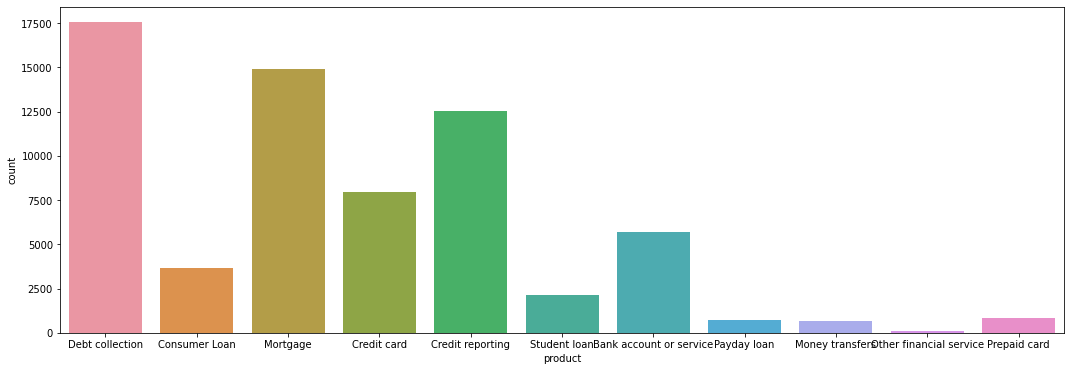

In [10]:
#used seaborn and matplot to generta plot

import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='product',data=df1)

#### From this plot we can see Debt Collection, Mortgage, and credit reporting received maximum number of complaints.

#### We’ll now analyze the contingency table in form of plot to understand which product has more customer disputes on their complaints after resolving the issues.

<AxesSubplot:xlabel='product'>

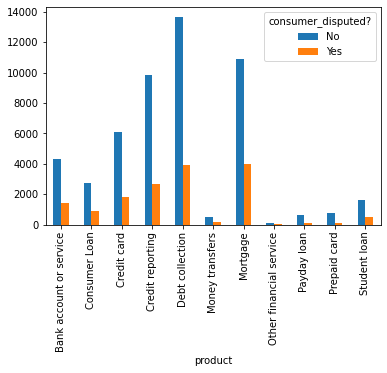

In [11]:
#plotted graph to check the customer disputed

pd.crosstab(df1['product'],df1['consumer_disputed?']).plot(kind='bar')

#### From above graph we can see that there is not much of difference in proportion of disputes raised by complaint for each product category.
#### So checking for other plots to recognize patterns within data.

#### 

##### Converting string Date time into Python Date time object

In [12]:
df1['date_received'] = pd.to_datetime(df1['date_received'])

In [13]:
df1.date_received.min(),df1.date_received.max()

(Timestamp('2015-03-19 00:00:00'), Timestamp('2016-04-20 00:00:00'))

In [14]:
df1['month'] = df1['date_received'].dt.month

<AxesSubplot:xlabel='month', ylabel='count'>

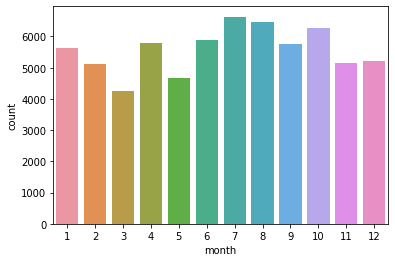

In [15]:
sns.countplot(x='month',data=df1)

#### Above plot shows no.of complaints per month.

<AxesSubplot:xlabel='timely_response', ylabel='count'>

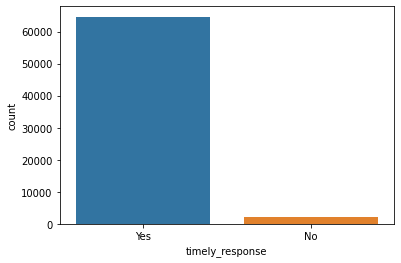

In [16]:
sns.countplot(x='timely_response',data=df1)

#### Above plot shows whether the reponse is given in time or not

## Text Data Preprocessing

#### Step 1: Converting Text data to Lowercase.

In [17]:
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [18]:
#sample to check o/p
df1['consumer_complaint_narrative'].sample(2)

276772    on xxxx/xxxx/2015 i was contacted by xxxx xxxx...
240606    nationstar mortgage is now playing the same ga...
Name: consumer_complaint_narrative, dtype: object

#### Step 2: Removing Punctuations.

In [19]:
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")

In [20]:
#sample to check o/p
df1['consumer_complaint_narrative'].sample(2)

541685    regions mortgage paid expense hazard insurance...
291317    my husband and i both have a loan through meri...
Name: consumer_complaint_narrative, dtype: object

#### Step 3: Text Standardization using dictionaries.

In [21]:
#we used three normalizazion dictionaries from these links :
#http://www.hlt.utdallas.edu/~yangl/data/Text_Norm_Data_Release_Fei_Liu/
#http://people.eng.unimelb.edu.au/tbaldwin/etc/emnlp2012-lexnorm.tgz
#http://luululu.com/tweet/typo-corpus-r1.txt


dico = {}
dico1 = open('doc1.txt', 'rb')
for word in dico1:
    word = word.decode('utf8')
    word = word.split()
    dico[word[1]] = word[3]
dico1.close()
dico2 = open('doc2.txt', 'rb')
for word in dico2:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico2.close()
dico3 = open('doc3.txt', 'rb')
for word in dico3:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico3.close()

In [22]:
def txt_std(words):
    list_words = words.split()
    for i in range(len(list_words)):
        if list_words[i] in dico.keys():
            list_words[i] = dico[list_words[i]]
    return ' '.join(list_words)

In [23]:
#applying txt_std function

df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].apply(txt_std)

In [24]:
#sample to check o/p
df1.consumer_complaint_narrative.head(1)

190126    xxxx has claimed i owe them 2700 for xxxx year...
Name: consumer_complaint_narrative, dtype: object

In [25]:
#replacing specified phrase

df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].str.replace(r"xx+\s","")

In [26]:
#sample to check o/p
df1['consumer_complaint_narrative'].head(1)

190126    has claimed i owe them 2700 for years despite ...
Name: consumer_complaint_narrative, dtype: object

#### Step 4: Removing Stopwords.

In [27]:
#removing stop words using stopwords.words('english') which returns a list of lowercase stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [28]:
#sample to check o/p
df1['consumer_complaint_narrative'].head(1)

190126    claimed owe 2700 years despite proof payment s...
Name: consumer_complaint_narrative, dtype: object

#### Step 5: Lemmatizing.

In [29]:
from textblob import Word
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x:' '.join([Word(i).lemmatize() for i in x.split()]))

In [30]:
df1.consumer_complaint_narrative.head(1)

190126    claimed owe 2700 year despite proof payment se...
Name: consumer_complaint_narrative, dtype: object

# Train/Test split
### We have split data in 75:25 Percentage. 

In [31]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(df1['consumer_complaint_narrative'], df1['product'],stratify=df1['product'], 
                                                    test_size=0.25)

## Feature engineering of consumer complaint with TF-IDF

### Label encoding target variable

In [32]:
from sklearn import preprocessing

enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)

###  TF-IDF vector representation

In [33]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df1['consumer_complaint_narrative'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

### LogisticRegression

#### Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
#### Logistic regression is used for solving the classification problems.



In [34]:
#takes time to run
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, linear_model, naive_bayes, metrics, svm
from sklearn.svm import LinearSVC


clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(xtrain_tfidf,train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [35]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 3}
0.8458806207562919


In [36]:
final_lr = LogisticRegression(C=5)
final_lr.fit(xtrain_tfidf,train_y)

LogisticRegression(C=5)

In [37]:
final_lr_predict = final_lr.predict(xvalid_tfidf)
lr_accuracy = metrics.accuracy_score(final_lr_predict, valid_y)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

Logistic Regression > Accuracy:  0.8445695126332176


In [38]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, final_lr_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.81      0.78      0.80      1428
          Consumer Loan       0.73      0.63      0.68       920
               Mortgage       0.79      0.82      0.81      1982
            Credit card       0.85      0.85      0.85      3132
       Credit reporting       0.83      0.87      0.85      4388
           Student loan       0.74      0.62      0.67       166
Bank account or service       0.93      0.95      0.94      3730
            Payday loan       1.00      0.04      0.07        27
        Money transfers       0.66      0.40      0.50       182
Other financial service       0.82      0.77      0.80       215
           Prepaid card       0.89      0.80      0.84       532

               accuracy                           0.84     16702
              macro avg       0.82      0.68      0.71     16702
           weighted avg       0.84      0.84      0.84     16702



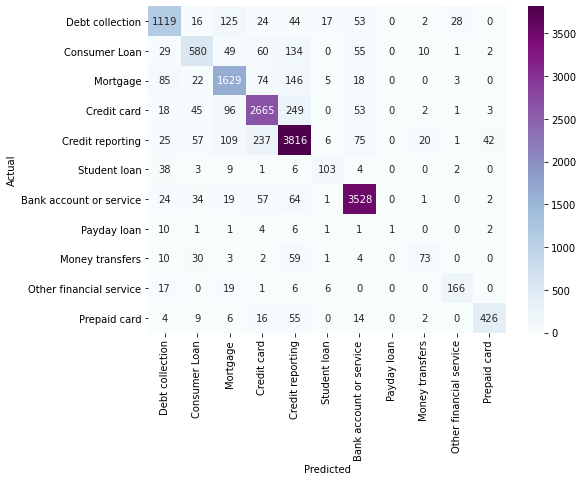

In [39]:


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, final_lr_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [45]:
import pickle

file = open('logistic_reg_model.pkl', 'wb')

pickle.dump(clf, file)

### We have acheived an accuracy of around 85% with a Logistic Regression model and the classification metrics are good for all departments except Payday loan - this might be due to less training instances of this product category and also on looking at the confusion matrix it is mostly being predicted as Credit reporting or debt collection which gives us an indication that this product is similar to one another or maybe linked with other.

### We might further improve the performance using SVM, GBM, Neural Networks and utilize hyperparameter tuning.

# Support Vector Machine(SVM)

#### We have used Support Vector Machine(SVM) supervised machine learning algorithms which are used both for classification and regression.
#### SVMs have their unique way of implementation as compared to other machine learning algorithms. Lately, they are extremely popular because of their ability to handle multiple continuous and categorical variables.

#### Advantages
#### SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. 
#### They also use less memory because they use a subset of training points in the decision phase. 
#### SVM works well with a clear margin of separation and with high dimensional space.

#### As our data set have 19 lables we came to a agreement that Support Vector Machine(SVM) is perfect.

In [40]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold

svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(xtrain_tfidf,train_y)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]})

In [41]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 0.1}
0.8439645686174801


In [42]:
final_svc = LinearSVC(C=0.1)
final_svc.fit(xtrain_tfidf,train_y)

LinearSVC(C=0.1)

In [43]:
final_svc_predict = final_svc.predict(xvalid_tfidf)
svc_accuracy = metrics.accuracy_score(final_svc_predict, valid_y)
print ("SVC > Accuracy: ", svc_accuracy)

SVC > Accuracy:  0.8451083702550592


In [44]:
print(classification_report(valid_y, final_svc_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.83      0.79      0.81      1428
          Consumer Loan       0.79      0.58      0.67       920
               Mortgage       0.80      0.83      0.81      1982
            Credit card       0.85      0.84      0.84      3132
       Credit reporting       0.82      0.88      0.85      4388
           Student loan       0.76      0.52      0.62       166
Bank account or service       0.92      0.96      0.94      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.74      0.23      0.35       182
Other financial service       0.83      0.69      0.75       215
           Prepaid card       0.87      0.82      0.84       532

               accuracy                           0.85     16702
              macro avg       0.74      0.65      0.68     16702
           weighted avg       0.84      0.85      0.84     16702



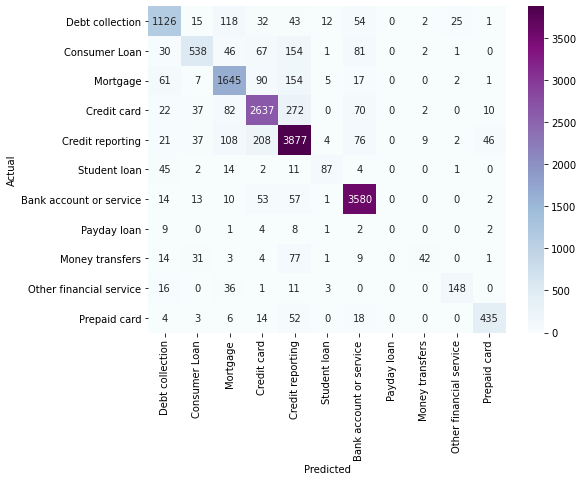

In [45]:

conf_mat = confusion_matrix(valid_y, final_svc_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [48]:
import pickle

file = open('svmmodel.pkl', 'wb')

pickle.dump(svc_model, file)


### We have acheived an accuracy of around 85% with Support Vector Machine(SVM).

# Deep Learning model

In [50]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.utils
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')   

In [51]:
total_complaints = np.append(train_x.values,valid_x.values)
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(train_x.values)#total_complaints
train_sequences = tokenizer.texts_to_sequences(train_x.values)
test_sequences = tokenizer.texts_to_sequences(valid_x.values)

In [53]:
word_index = tokenizer.word_index# dictionary containing words and their index
print('Found %s unique tokens.' % len(word_index))

Found 51412 unique tokens.


In [54]:
MAX_SEQUENCE_LENGTH = max([len(c.split()) for c in total_complaints])

In [55]:
MAX_SEQUENCE_LENGTH

394

In [56]:
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

In [57]:
print(train_data.shape)
print(test_data.shape)

(50104, 394)
(16702, 394)


In [58]:
enc = preprocessing.LabelEncoder()
train_labels = enc.fit_transform(train_y)
test_labels = enc.fit_transform(valid_y)

In [59]:
print(enc.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

[ 0  1  2  3  4  5  6  7  8  9 10]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([ 4283,  2758,  5947,  9394, 13164,   500, 11189,    83,   544,
         646,  1596], dtype=int64))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([1428,  920, 1982, 3132, 4388,  166, 3730,   27,  182,  215,  532],
      dtype=int64))


In [60]:
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

NameError: name 'to_categorical' is not defined

# CNN w/ Pre-trained word embeddings(GloVe)

### We'll use pre-trained embeddings such as Glove which provides word based vector representation trained on a large corpus.

### It is trained on a dataset of one billion tokens (words) with a vocabulary of 400 thousand words. The glove has embedding vector sizes, including 50, 100, 200 and 300 dimensions.

In [56]:

from io import StringIO
import os
import string
import gensim
from gensim.models import Word2Vec
import itertools
import scipy

embeddings_dict = {}

f =  open("glove.6B.300d.txt",encoding='UTF-8')

for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector
    
print('Found %s word vectors.' % len(embeddings_dict))

Found 400000 word vectors.


In [57]:
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [58]:
[(k,v) for k,v in word_index.items() if v==4]

[('loan', 4)]

In [59]:
embedding_matrix[4]

array([ 0.13474999,  0.063568  , -0.37950999, -0.080729  ,  0.34176001,
       -0.0053481 ,  0.80001003, -0.78824002, -0.47262999, -0.89402002,
        0.086908  , -0.051773  ,  0.57349998, -0.26681   , -0.0043554 ,
       -0.68673003,  0.54759002, -0.47711   ,  0.12997   , -0.50748003,
        0.073666  , -0.56199998,  0.19243   , -0.022735  ,  0.15757   ,
        0.68008   , -0.48374999,  0.14399   , -0.69022   ,  0.26741001,
       -0.53082001, -0.29096001,  0.32907999,  0.12313   , -1.14779997,
       -0.51828998, -0.018956  ,  0.02077   , -0.0015803 , -0.053114  ,
       -0.10982   , -0.83578998, -0.46337   ,  0.85992002,  0.57225001,
       -0.33202001, -0.23357999,  0.80937999, -0.43586999,  0.35385001,
        0.0055405 ,  0.068909  ,  0.13897   ,  0.16237999,  0.038382  ,
       -0.16306999, -0.022701  ,  0.14324   , -0.25878   , -0.47661999,
        0.25588   , -0.23389   , -0.14936   , -0.51688999,  0.44329   ,
        0.49015   ,  0.25725001, -0.45041999,  0.66949999, -0.32

In [60]:
vocab_size = len(tokenizer.word_index)+1

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM , weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True))
model.add(Dropout(0.3))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['acc'])


In [62]:
#performed 8 epochs with a batch size of 64

history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

Epoch 1/8
783/783 [==============================] - 408s 519ms/step - loss: 1.3270 - acc: 0.5763 - val_loss: 0.6505 - val_acc: 0.8025
Epoch 2/8
783/783 [==============================] - 411s 525ms/step - loss: 0.6665 - acc: 0.7966 - val_loss: 0.5930 - val_acc: 0.8256
Epoch 3/8
783/783 [==============================] - 404s 516ms/step - loss: 0.5658 - acc: 0.8283 - val_loss: 0.5536 - val_acc: 0.8442
Epoch 4/8
783/783 [==============================] - 404s 516ms/step - loss: 0.5163 - acc: 0.8451 - val_loss: 0.5417 - val_acc: 0.8448
Epoch 5/8
783/783 [==============================] - 408s 521ms/step - loss: 0.4875 - acc: 0.8511 - val_loss: 0.5339 - val_acc: 0.8494
Epoch 6/8
783/783 [==============================] - 403s 515ms/step - loss: 0.4584 - acc: 0.8631 - val_loss: 0.5716 - val_acc: 0.8479
Epoch 7/8
783/783 [==============================] - 400s 511ms/step - loss: 0.4382 - acc: 0.8675 - val_loss: 0.5522 - val_acc: 0.8476
Epoch 8/8
783/783 [==============================] - 40

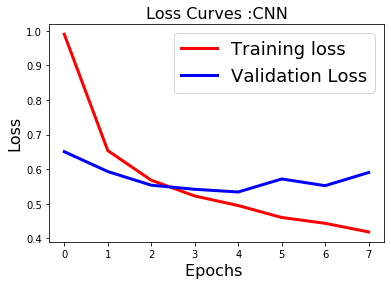

In [63]:
#plotting loss curves 
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
plt.show()

#### After 3 epochs the CNN tends to be overfitting the training data and therefore we need to implement early stopping to prevent such instances of overfitting and tune the number of epochs during training.

### Predictions on test data

In [64]:
predicted=model.predict(test_data)
predicted

array([[5.3358228e-05, 1.7672184e-01, 2.8677896e-06, ..., 5.5676144e-01,
        3.1638328e-10, 1.4468869e-03],
       [1.1353781e-02, 2.5273609e-06, 7.5471457e-03, ..., 5.9119247e-07,
        9.7878712e-01, 3.1516599e-08],
       [7.6600601e-04, 1.5958094e-03, 2.8457303e-04, ..., 3.0696115e-06,
        1.0388401e-11, 4.5381234e-06],
       ...,
       [1.3063318e-04, 2.9160117e-04, 4.8916400e-03, ..., 6.3161197e-06,
        1.4084380e-08, 2.6008527e-05],
       [7.6666651e-03, 2.2105644e-02, 4.9987752e-02, ..., 1.8254317e-03,
        4.8822883e-04, 1.7325779e-03],
       [2.5169741e-04, 7.0479150e-06, 1.8173014e-06, ..., 1.6554663e-09,
        1.3528830e-16, 1.9161643e-08]], dtype=float32)

### Model evaluation

In [65]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: \n{}'.format(precision))
print('recall: \n{}'.format(recall))
print('fscore: \n{}'.format(fscore))
print('support: \n{}'.format(support))

precision: 
[0.89767842 0.8171875  0.87960829 0.89806496 0.79095934 0.72727273
 0.94064171 0.         0.72916667 0.82795699 0.91004184]
recall: 
[0.73109244 0.56847826 0.77043391 0.8298212  0.91317229 0.62650602
 0.94316354 0.         0.19230769 0.71627907 0.81766917]
fscore: 
[0.80586646 0.67051282 0.82140936 0.86259542 0.84768352 0.67313916
 0.94190094 0.         0.30434783 0.7680798  0.86138614]
support: 
[1428  920 1982 3132 4388  166 3730   27  182  215  532]


In [66]:
print(classification_report(labels_test, predicted.round(),target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.90      0.73      0.81      1428
          Consumer Loan       0.82      0.57      0.67       920
               Mortgage       0.88      0.77      0.82      1982
            Credit card       0.90      0.83      0.86      3132
       Credit reporting       0.79      0.91      0.85      4388
           Student loan       0.73      0.63      0.67       166
Bank account or service       0.94      0.94      0.94      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.73      0.19      0.30       182
Other financial service       0.83      0.72      0.77       215
           Prepaid card       0.91      0.82      0.86       532

              micro avg       0.87      0.83      0.85     16702
              macro avg       0.77      0.65      0.69     16702
           weighted avg       0.87      0.83      0.85     16702
            samples avg

#### Now, we'll initialize our Embedding layer from scratch and learning its weights during training instead of using a pre-trained word embeddings and build a small 1D convnet to solve our classification problem.

In [68]:
#The Embedding layer requires the specification of the vocabulary size (vocab_size), 
#the size of the real-valued vector space EMBEDDING_DIM = 100,
#and the maximum length of input documents max_length .
vocab_size = len(tokenizer.word_index)+1
EMBEDDING_DIM = 300
max_length = 394

In [69]:
model = Sequential()
model.add(Embedding(vocab_size,
 300,
 input_length=max_length
 ))
model.add(Dropout(0.3))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))
model.compile(loss='categorical_crossentropy',
 optimizer="rmsprop",
 metrics=['acc'])

In [70]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

Epoch 1/8
783/783 [==============================] - 413s 526ms/step - loss: 1.3188 - acc: 0.5677 - val_loss: 0.6011 - val_acc: 0.8249
Epoch 2/8
783/783 [==============================] - 402s 513ms/step - loss: 0.5830 - acc: 0.8250 - val_loss: 0.6344 - val_acc: 0.8303
Epoch 3/8
783/783 [==============================] - 401s 512ms/step - loss: 0.5050 - acc: 0.8497 - val_loss: 0.5935 - val_acc: 0.8409
Epoch 4/8
783/783 [==============================] - 402s 514ms/step - loss: 0.4487 - acc: 0.8670 - val_loss: 0.5774 - val_acc: 0.8449
Epoch 5/8
783/783 [==============================] - 402s 514ms/step - loss: 0.4097 - acc: 0.8773 - val_loss: 0.6006 - val_acc: 0.8446
Epoch 6/8
783/783 [==============================] - 408s 521ms/step - loss: 0.3693 - acc: 0.8898 - val_loss: 0.6352 - val_acc: 0.8494
Epoch 7/8
783/783 [==============================] - 401s 512ms/step - loss: 0.3398 - acc: 0.8986 - val_loss: 0.5898 - val_acc: 0.8561
Epoch 8/8
783/783 [==============================] - 40

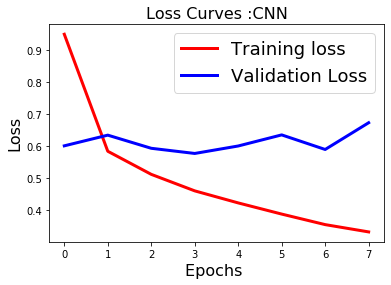

In [71]:
#plotting loss curves
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
plt.show()

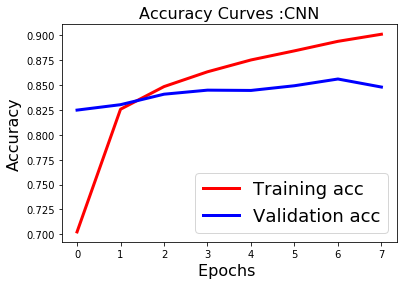

In [72]:
#plotting accuracy curves
fig1 = plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves :CNN',fontsize=16)
plt.show()

### Predictions on test data

In [73]:

predicted=model.predict(test_data)
predicted

array([[1.41389508e-04, 2.79973894e-02, 1.16662311e-04, ...,
        7.70196497e-01, 2.34712772e-07, 6.68755383e-04],
       [3.23602301e-03, 3.89144583e-09, 2.31465069e-03, ...,
        3.14144162e-11, 9.94415402e-01, 5.14443468e-13],
       [5.57632477e-04, 4.74340231e-05, 4.58465889e-04, ...,
        1.16497265e-08, 9.34757960e-09, 3.89273264e-05],
       ...,
       [1.23423524e-03, 6.21064217e-04, 2.70185709e-01, ...,
        3.20647246e-06, 3.62554187e-04, 3.81969367e-05],
       [3.03865294e-03, 3.91883366e-02, 1.14093468e-01, ...,
        5.90129639e-04, 3.37590427e-05, 1.12388353e-03],
       [2.54808590e-02, 3.61643652e-05, 4.16024923e-02, ...,
        3.62442382e-10, 2.79001455e-07, 2.07678727e-06]], dtype=float32)

### Model evaluation

In [74]:

import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted.round()))

precision: [0.89806678 0.83138564 0.76371681 0.84653465 0.86314581 0.79464286
 0.94012945 0.         0.55652174 0.79       0.9       ]
recall: [0.71568627 0.54130435 0.87083754 0.87356322 0.85665451 0.53614458
 0.93458445 0.         0.35164835 0.73488372 0.86278195]
fscore: [0.79657054 0.65569454 0.81376709 0.85983658 0.85988791 0.64028777
 0.93734875 0.         0.43097643 0.76144578 0.88099808]
support: [1428  920 1982 3132 4388  166 3730   27  182  215  532]
############################
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1428
           1       0.83      0.54      0.66       920
           2       0.76      0.87      0.81      1982
           3       0.85      0.87      0.86      3132
           4       0.86      0.86      0.86      4388
           5       0.79      0.54      0.64       166
           6       0.94      0.93      0.94      3730
           7       0.00      0.00      0.00        27
           8       

## Summary

#### We have trained dataset on Logistic Regression, Support Vector Machine(SVM), and CNN.
#### The following are the results of using SVM and Logistic Regression. SVM optimises the margin  between the nearest support vectors, while logistic regression aims to increase the probability of the posterior class.
#### SVM is deterministic (but we can use Platts model for probability score) while LR is probabilistic.
#### For the kernel space, SVM is faster.

#### In the end, we have achieved an accuracy of around 85% for Logistic Regression & Support Vector Machine(SVM) and around 86% for CNN.

#### we get good results with CNN.

#### From the learning curves in CNN it is clear the model needs to be tuned for overfitting by selecting hyperparameters such as no of epochs via early stopping and dropout for regularization.


In [2]:
from flask import Flask,render_template,url_for,request
import pandas as pd 
from sklearn.svm import LinearSVC
import joblib



app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
    pipeline = joblib.load('text_classification.joblib')
    labels = ['Debt collection', 'Mortgage','Credit reporting', 'Credit card','Bank account or service','Consumer Loan','Student loan','Prepaid card','Payday loan','Money transfers','Other financial service']
    my_file = open("Monitoring.csv", "a")
    if request.method == 'POST':
        message = request.form['message']
        data = [message]
        prediction = pipeline.predict(data)
        my_file.write("\n{},".format(str(message)))
        my_file.write("{},".format(str(labels[int(prediction)])))
        my_file.close()

        return render_template('predict.html',prediction = prediction)

    



if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
!python app.py